In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from sympy import symbols, solve
import sympy as sy
from matplotlib import dates
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import manifold
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split

In [4]:
## load file
file1='/Users/aliceqichaowu/Desktop/38615/lab1_dataset.csv'
df=pd.read_csv(file1)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 552 entries, experimental_proprty to n6Ring
dtypes: float64(444), int64(105), object(3)
memory usage: 8.4+ MB
None


,experimental_proprty,MS_enc,nHetero,nX,C2SP3,MPC5,ATS0i,NaasN,SsCH3,nCl,...,AATS0Z,ATSC0are,ATSC2pe,SsCl,ATS6v,AATSC1dv,nFARing,AATS2v,Xp-7dv,n6Ring
0,3.54,PPENPINEAPLE42,5,1,0,83,7305.483137,1,2.105782,1,...,26.444444,2.995920,-0.508149,5.976320,16177.071020,1.102539,0,223.767000,0.903808,3
1,-1.18,PPENPINEAPLE42,11,0,3,114,9532.633527,0,4.605907,0,...,31.796610,9.996180,2.554415,0.000000,29893.511410,0.854039,1,225.916087,1.887922,3
2,3.69,PPENPINEAPLE42,5,1,2,69,5845.023999,0,1.422763,1,...,35.513514,3.773573,-0.113725,6.285975,17264.331087,0.793417,1,241.492298,1.098203,2
3,3.37,HTXPTDWTTWOBJR,9,1,3,105,7388.625069,0,0.000000,1,...,35.869565,6.699887,-0.114253,5.958016,20506.327989,0.421656,1,254.318903,1.164550,2
4,3.10,PPENPINEAPLE42,7,0,2,68,9082.560968,1,9.734779,0,...,21.018182,5.862455,1.664804,0.000000,22748.101433,1.602810,0,207.685522,0.492884,1


In [5]:
## select columns with numbers and take a look of the dataset
df.dtypes[df.dtypes == 'O']

MS_enc    object
MIF       object
SMIF      object
dtype: object

In [6]:
print(df['MIF'].value_counts())
print(df['MS_enc'].value_counts())
print(df['SMIF'].value_counts())

Computation failed    100
45                     58
52                     57
54                     55
58                     55
                     ... 
203                     1
128                     1
134                     1
86                      1
88                      1
Name: MIF, Length: 85, dtype: int64
PPENPINEAPLE42    1569
UHOVQNZJYSORNB      41
RCRMUKSWQWDMNL      17
ZUOUZKKEUPVFJK      15
VHEGBLPHXSCODD      13
NRTUTGBOQZQBMB      13
GALNGAIOIHBIMC      13
WFGFEOLNELJISV      12
VFVXVRPTRGHSHB      12
GOMNOOKGLZYEJT      12
GCRYKXLRCQDDAD      11
YBHCYGZJSRSNRK      11
HMOUISRYHLEUNP      11
BOTNYLSAWDQNEX      10
JYTRDJFJTLMAHG      10
JHAGKBVBZDYISA      10
JBKDDNGUOPDBIN      10
DSAYTZOSLVGXMN       9
YYVYAPXYZVYDHN       9
FIVCRRVYLAXYFC       8
UGYJQWOEXDFOBE       8
IOJUPLGTWVMSFF       8
GKFFFOLFBJUEFN       8
NXYOGONNLGHJLI       8
UFWIBTONFRDIAS       7
NBWZTGIODNJYRQ       7
MTSNDBYBIZSILH       7
SMWDFEZZVXVKRB       7
KCZQVDUNRPTDJR       7
NEEMPYCQFCV

In [7]:
df=df.select_dtypes(include=['number'])


In [8]:
## Find out how many nan values and remove the rows
print('There are %i nan in the dataframe' % df.isna().sum().sum())
print(df.loc[:, df.isnull().any()]) # returns columns with any nan values
print('Since there are only 100 nan out of 2000 numbers, I will drop the values if I need to model the data')
len(df.dropna(axis=0))
df=df.dropna()
df.isnull().values.any()
print(df.shape)

There are 100 nan in the dataframe
             MW2
0     340.145474
1     494.118143
2     321.059027
3     419.070655
4     381.216475
...          ...
1995  537.229994
1996  362.119734
1997  401.206304
1998  402.055339
1999  370.180504

[2000 rows x 1 columns]
Since there are only 100 nan out of 2000 numbers, I will drop the values if I need to model the data
(1900, 549)


In [28]:
print(y_train.shape)
print(mask.shape)


(1520, 1)
(1520,)


is_inlier 


## Detect Outliers

In [30]:
CONTAMINATION=.2    # The expected outliers to real data ratio
BOOTSTRAP = False   # True if you want to use the bootstrap method; 

# Exctract the data without column names from the dataframe
data = df.values

# We will start by splitting the data into X/y train/test data
# Separating out the target
X = df.iloc[:,1:]
y = df.loc[:,['experimental_proprty']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Next, we will set up the Isolation Forest classifier that will detect the outliers
i_forest = IsolationForest(contamination=CONTAMINATION, bootstrap=BOOTSTRAP)
is_inlier = i_forest.fit_predict(X_train)    # +1 if inlier, -1 if outlier

# Finally, we will select the rows without outliers
mask = is_inlier != -1
# and remove these from the train data
X_train1  = X_train[mask,:]

df_wo_outliers=pd.DataFrame(X_train, columns=df.columns[:-1])
df_boxplot = pd.DataFrame(data={'With outliers':df['RM'], 'Without outliers':df_wo_outliers['RM']})
fig = px.box(df_boxplot)
fig.show()

TypeError: '(array([ True,  True, False, ..., False,  True,  True]), slice(None, None, None))' is an invalid key

In [11]:

## Get the general statistic table and find out outliers
print(df.describe())
print('From the statistics table, we can see that most features should have outliers since the max is far from mean.')

## Define the function of removing outliers. 
# If the data points are greater than 2std from the mean of each column, they are treated as outliers and removed
def remove_outliers(df,columns,n_std):
    for col in columns:
        mean = df[col].mean()
        sd = df[col].std()       
        df = df[(df[col] <= mean+(n_std*sd))]       
    return df

df=remove_outliers(df,df.columns,5)
print(df.shape)

       experimental_proprty      nHetero           nX        C2SP3  \
count           1900.000000  1900.000000  1900.000000  1900.000000   
mean               2.171242     7.169474     0.773684     2.197368   
std                1.212864     2.813814     1.128100     2.472704   
min               -1.500000     1.000000     0.000000     0.000000   
25%                1.370000     5.000000     0.000000     0.000000   
50%                2.350000     7.000000     0.000000     2.000000   
75%                3.100000     9.000000     1.000000     3.000000   
max                4.500000    34.000000     9.000000    27.000000   

              MPC5         ATS0i        NaasN        SsCH3          nCl  \
count  1900.000000   1900.000000  1900.000000  1900.000000  1900.000000   
mean     87.379474   7909.667964     0.319474     2.493601     0.306842   
std      32.936975   2530.967204     0.609336     2.602584     0.606317   
min       5.000000   2046.021324     0.000000     0.000000     0.0000

In [20]:
## Find correlations across all vairables, and set up dataframe df1 by removing all the high correlated variables
corr_matrix=df.iloc[:,1:].corr()
corr_matrix
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool_))
to_drop = [column for column in upper_tri.columns if any(abs(upper_tri[column]) > 0.95)]
print('There are '+str(len(to_drop))+' variables are highly correlated')
df1 = df.drop(df[to_drop], axis=1)
print(df1.shape)

There are 259 variables are highly correlated
(1526, 290)


experimental_proprty    1.000000
SLogP                   0.430200
nAromAtom               0.343878
nBondsA                 0.338587
nAromBond               0.338587
                          ...   
SsBr                         NaN
SdNH                         NaN
MIF2                         NaN
MIF3                         NaN
StCH                         NaN
Name: experimental_proprty, Length: 549, dtype: float64


Text(0, 0.5, 'Experimental property')

<Figure size 432x288 with 0 Axes>

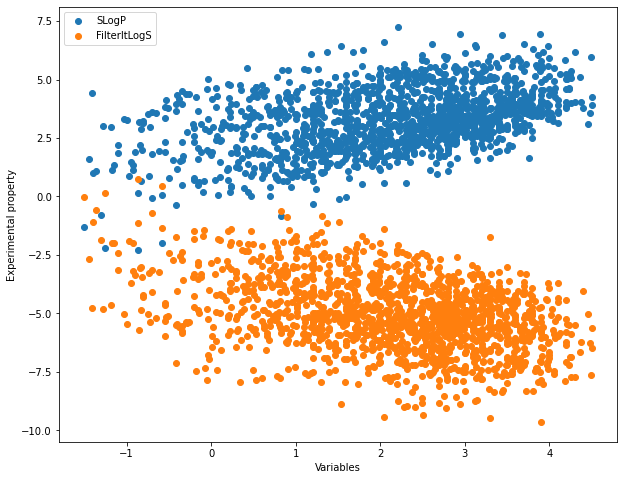

In [8]:
## Find out if experiemntal property is correlated with other features
abs_corr=df.corr()
print(abs_corr["experimental_proprty"].sort_values(ascending=False))
plt.figure()
plt.figure(figsize=(10, 8)) 
plt.scatter(df["experimental_proprty"],df['SLogP'],label='SLogP')
plt.scatter(df["experimental_proprty"],df['FilterItLogS'],label='FilterItLogS')
plt.legend ()
plt.xlabel('Variables')
plt.ylabel('Experimental property')

In [9]:
## Separate features and target, standardize features
# df: Use dataset with highly correlated variables.   
# df1: Use dataset without highly correlated variables.  

# Separating out the features
x = df.iloc[:,1:]
x1 = df1.iloc[:,1:]

# Separating out the target
y = df.loc[:,['experimental_proprty']]

# Standardizing the features
x = StandardScaler().fit_transform(x)
x1=StandardScaler().fit_transform(x1)

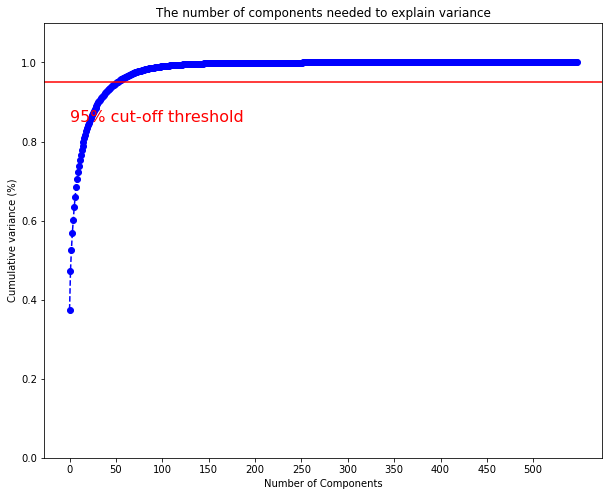

In [23]:
pca = PCA().fit(x)
plt.rcParams["figure.figsize"] = (12,6)

# fig, ax = plt.subplots()
plt.subplots(figsize=(10, 8)) 
xi = np.arange(0, x.shape[1],step=1)
pca_y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, pca_y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0,x.shape[1] , step=50)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [15]:
## Manually divide y into ten groups, and color code by these 10 groups
## Define a plot function which color codes the prinicipal components from dimensionality reduction
range_y=np.linspace(float(y.min()),float(y.max()),num=11)
print(range_y)
y_arr=np.array(y)
# plt.scatter(x_pca[:,0],x_pca[:,1],c=y.values,s =10, alpha=0.5,cmap=plt.cm.get_cmap('coolwarm',10))
def plot_function(X, algo=""):
    with plt.style.context(("seaborn", "ggplot")):
        fig = plt.figure(1, figsize=(10, 6))

        colors = ['red','green','orange','blue','purple','cyan','magenta', 'firebrick', 'lawngreen','indigo']
        for i in range(0,len(range_y)-1):
            newy=np.where(np.logical_and(y_arr>=range_y[i], y_arr<=range_y[i+1]))
            plt.scatter(X[newy,0],X[newy,1], c = colors[i], marker="$"+str(i)+"$", s =30, alpha=0.5)
        plt.xlabel("New Feature 1")
        plt.ylabel("New Feature 2")
        plt.title(algo)
        plt.show()

[-1.5 -0.9 -0.3  0.3  0.9  1.5  2.1  2.7  3.3  3.9  4.5]


[0.3748139 0.0981749]
(1526, 2)


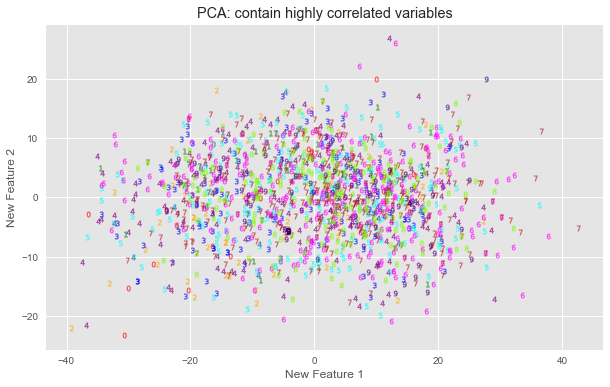

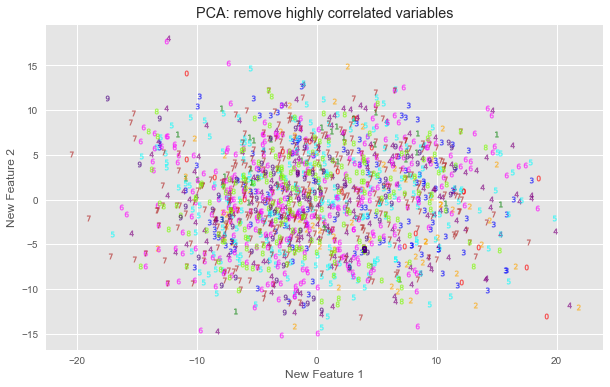

In [18]:
## Dimensionality reduction: PCA 
pca = PCA(n_components=2).fit(x)
pca1 = PCA(n_components=2).fit(x1)
print(pca.explained_variance_ratio_)
x_pca = pca.fit_transform(x)
x_pca1 = pca.fit_transform(x1)
print(x_pca.shape)

fig = plt.figure(1, figsize=(10, 6))
plot_function(x_pca, "PCA: contain highly correlated variables")

plot_function(x_pca1, "PCA: remove highly correlated variables")

(1526, 2)


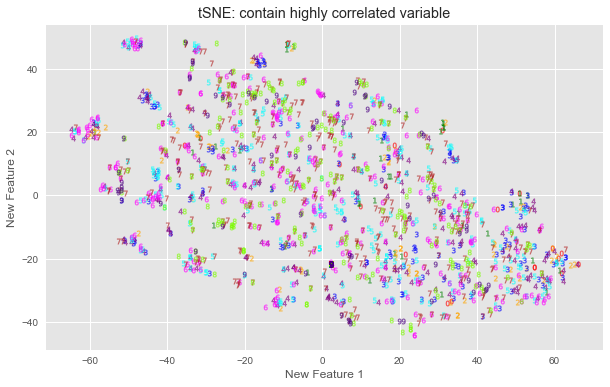

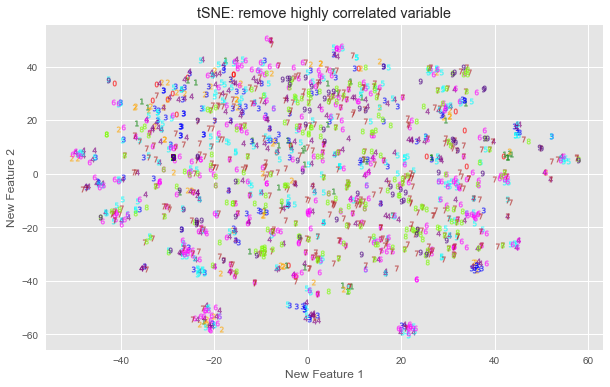

In [19]:
## Non-linear dimensionality reduction: tSNE  (pair-to-pair celld distances, distance scaling)
tsne = manifold.TSNE(random_state=42, n_components=2)
x_tsne = tsne.fit_transform(x)
x_tsne1 = tsne.fit_transform(x1)
print(x_tsne.shape)
plot_function(x_tsne, "tSNE: contain highly correlated variable")
plot_function(x_tsne1, "tSNE: remove highly correlated variable")

# One hot encoding, 

In [1]:
## tqgm: get to know the for loop
method=['Euclidean','Cosine']
method[1]

'Cosine'